# Read and analyze case 6126 E08

**BMED320: Methods in biomedical research (IMC-ML)**<br>
_Arvid Lundervold, 20201004_

See: https://github.com/arvidl/BMED320-imaging-mass-cytometry-ml/blob/master/notebooks/imc-case-damond-2019/README.md

In [4]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from skimage import io
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy import ndimage
from skimage.filters import threshold_otsu
#from skimage import filters
import nibabel as nib
import os
home = os.path.expanduser('~')  # To make path to local home directory

In [5]:
fn_tiff = './data/E08_a0_full.tiff'
fn_csv = './data/E08_a0_full.csv'
fn_panel = './data/table1_IMC_panel_37x4.csv'

# For direct inclusion of figures in the Overleaf document (Overleaf is synced with Dropbox):
fn_fig_base = '%s/Dropbox/apps/Overleaf/Imaging_Mass_Cytometry_and_Machine_Learning_BMED320_project2020/Figs' % (home)

In [6]:
im = io.imread(fn_tiff)
print(type(im))
print(im.shape)

<class 'numpy.ndarray'>
(37, 530, 567)


In [7]:
n_chn = im.shape[0]
n_chn

37

In [8]:
df = pd.read_csv(fn_csv, usecols=[0], names=['chn'], header=None)
df.shape

(37, 1)

In [9]:
df.head()

chn
0  In113
1  In115
2  Pr141
3  Nd142
4  Nd143

In [10]:
df.tail()

chn
32  Yb174
33  Lu175
34  Yb176
35  Ir191
36  Ir193

In [11]:
df.chn.iloc[0]

'In113'

In [12]:
df_p = pd.read_csv(fn_panel)
print(df_p.shape)
df_p

(37, 4)


Short Name                                            Antigen  \
0         INS                                            Insulin   
1         PIN                                         Proinsulin   
2         GCG                                           Glucagon   
3         SST                                       Somatostatin   
4         PPY                             Pancreatic polypeptide   
5      NKX6-1                           Homeobox protein Nkx-6.1   
6        PDX1                 Pancreatic and duodenal homeobox 1   
7        IAPP                                             Amylin   
8       PCSK2                            Proprotein convertase 2   
9         SYP                                      Synaptophysin   
10       CD99                                               CD99   
11     SLC2A1                              Glucose transporter 1   
12      PTPRN  Receptor-type tyrosine-protein phosphatase-like N   
13      AMY2A                                 Pancreatic amylase   
14      KRT19                                     Cytokeratin 19   
15       CD44                                               CD44   
16       CD45                                               CD45   
17     CD45RA                                             CD45RA   
18       CD3e                                               CD3ɛ   
19        CD4                                                CD4   
20       CD8a                                               CD8a   
21       CD20                                               CD20   
22       CD68                                               CD68   
23        MPO                                    Myeloperoxidase   
24      FOXP3                                    Forkhead box P3   
25       CD38                                               CD38   
26        CDH                                      E-/P-cadherin   
27       CD31                                               CD31   
28        SMA                                Smooth muscle actin   
29      KI-67                                              Ki-67   
30        pH3                                 Phospho-histone H3   
31       pRB1                             Phospho-retinoblastoma   
32     cPARP1  Cleaved caspase 3 + cleaved poly (ADP-ribose) ...   
33        CA9                              Carbonic anhydrase IX   
34         H3                                         Histone H3   
35      Ir191                                (DNA intercalators)   
36      Ir193                                (DNA intercalators)   

        Main Target Cells Metal Tag  
0                       β     141Pr  
1                       β     154Sm  
2                       α     156Gd  
3                       δ     159Tb  
4                       γ     153Eu  
5                       β     169Tm  
6              β δ ductal     158Gd  
7                       β     167Er  
8                       α     144Nd  
9               Endocrine     160Gd  
10              Endocrine     145Nd  
11              Endocrine     148Nd  
12              Endocrine     174Yb  
13                 Acinar     150Nd  
14                 Ductal     161Dy  
15               Exocrine     143Nd  
16                 Immune     162Dy  
17                 Immune     164Dy  
18                      T     152Sm  
19               Helper T     171Yb  
20            Cytotoxic T     165Ho  
21                      B     149Sm  
22  Monocytes macrophages     146Nd  
23            Neutrophils     147Sm  
24           Regulatory T     163Dy  
25                 Immune     142Nd  
26             Epithelial     173Yb  
27            Endothelial     172Yb  
28                Stromal     115In  
29          Proliferating     168Er  
30          Proliferating     170Er  
31                Cycling     175Yb  
32              Apoptotic     176Yb  
33                Hypoxic     166Er  
34                 Nuclei     113In  
35                    DNA     191Ir  
36          

### Plot all channels (except for the last) as a 6 x 6 grid

With histogram equalization for better visualization
https://stackoverflow.com/questions/28518684/histogram-equalization-of-grayscale-images-with-numpy

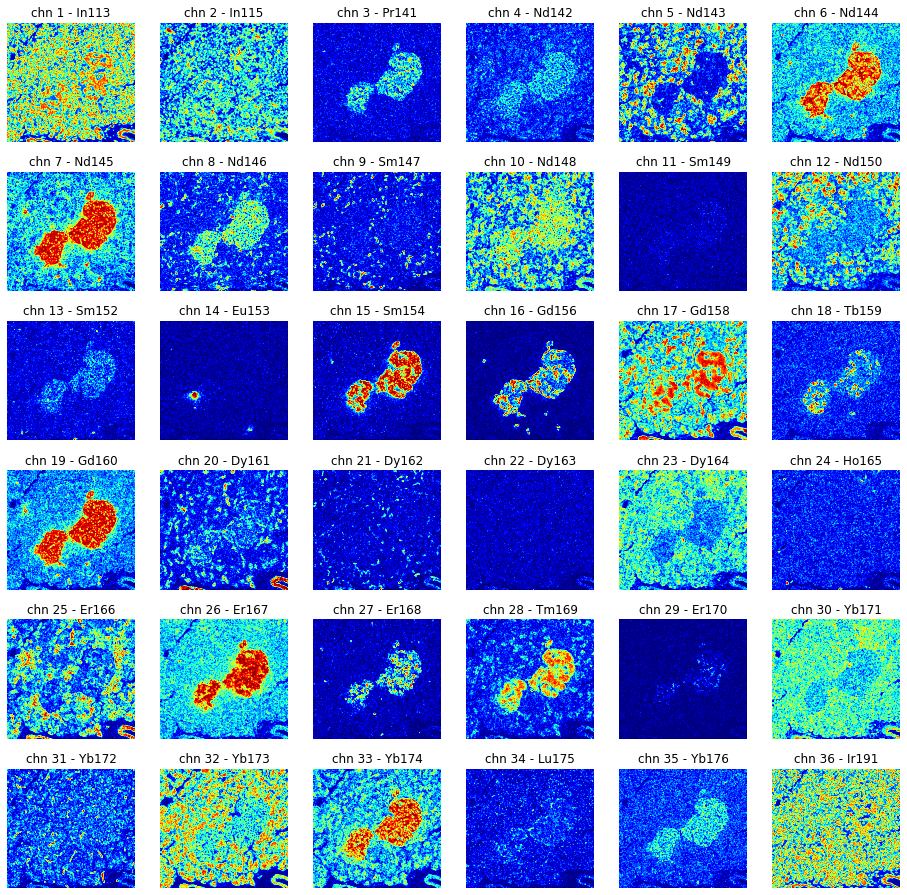

In [13]:
fig, axes = plt.subplots(6, 6, figsize=(16, 16), sharex=False, sharey=False)
ax = axes.ravel()
for i, item in enumerate(range(n_chn-1)):
    chn = np.squeeze(im[i,:,:])
    chn_eq = np.sort(chn.ravel()).searchsorted(chn)
    ax[i].imshow(chn_eq, cmap='jet' )   # cmap='jet', 'gray'
    ax[i].set_title('chn %d - %s' % ((i+1), df.chn.iloc[i]))
    ax[i].axis('off')
plt.show()

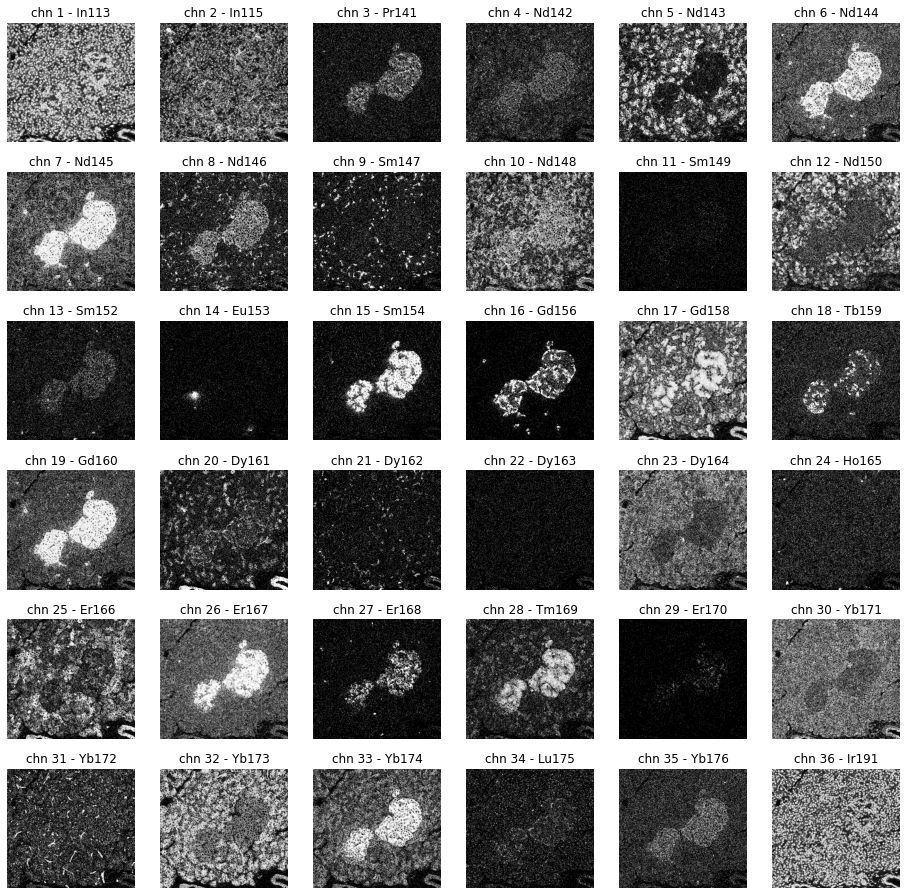

In [14]:
fig_fn = '%s/BMED320_experiments_case6126_E08_channel_eq_mosaic.pdf' % fn_fig_base
fig, axes = plt.subplots(6, 6, figsize=(16, 16), sharex=False, sharey=False)
ax = axes.ravel()
for i, item in enumerate(range(n_chn-1)):
    chn = np.squeeze(im[i,:,:])
    chn_eq = np.sort(chn.ravel()).searchsorted(chn)
    ax[i].imshow(chn_eq, cmap='gray' )   # cmap='jet', 'gray'
    ax[i].set_title('chn %d - %s' % ((i+1), df.chn.iloc[i]))
    ax[i].axis('off')
plt.savefig(fig_fn, bbox_inches='tight')
plt.show()

## Proinsulin, Glucagon, Somatostatin staining

|Antigen| Short name | Main target cell | Metal tag | Color (pseudo) | Chn name |Chn no.|
|:--------|:---:|:----:|:-----:|:---------:|:-----:|:---:|
|Proinsulin| PIN | beta | 154Sm |  Magenta |   Sm154 | 15 |
|Glucagon| GCG | alpha | 156Gd |  Cyan |   Gd154 | 16 |
|Somatostatin| SST | delta | 159Tb |  Yellow |   Tb159 | 18 |



### TO-DO: CHECK THIS!

In [15]:
#my_chn = [14, 15, 17]   # channel numebring starts at 0
my_chn = [17, 15, 14]   #  AD HOC to match alphabetical order of colors
#my_cols = ['magenta', 'cyan', 'yellow']
my_cols = ['cyan', 'magenta', 'yellow']  # AD HOC alphabetical order of colors

dims = list(np.squeeze(im[0,:,:]).shape)
dims.append(3)

pseudo_im = np.zeros(shape=dims)

k=0
for name, hex in mpl.colors.cnames.items():
    if (name=='magenta' or name=='cyan' or  name=='yellow'):
        h = hex.lstrip('#')
        rgb = tuple(int(h[i:i+2], 16) for i in (0, 2, 4))
        print(k, name, hex, rgb, rgb[0], rgb[1], rgb[2], 'chn:', my_chn[k]+1, df.chn[my_chn[k]])
        this_img = (np.squeeze(im[my_chn[k],:,:]))
        this_img = this_img/np.max(this_img)
        pseudo_im[:,:,k] = this_img*rgb[0] + \
                           this_img*rgb[1] + \
                           this_img*rgb[2]
        pseudo_im[:,:,k] = 5 * pseudo_im[:,:,k] / np.max(pseudo_im[:,:,k]) # (256*3)
        k=k+1

0 cyan #00FFFF (0, 255, 255) 0 255 255 chn: 18 Tb159
1 magenta #FF00FF (255, 0, 255) 255 0 255 chn: 16 Gd156
2 yellow #FFFF00 (255, 255, 0) 255 255 0 chn: 15 Sm154


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


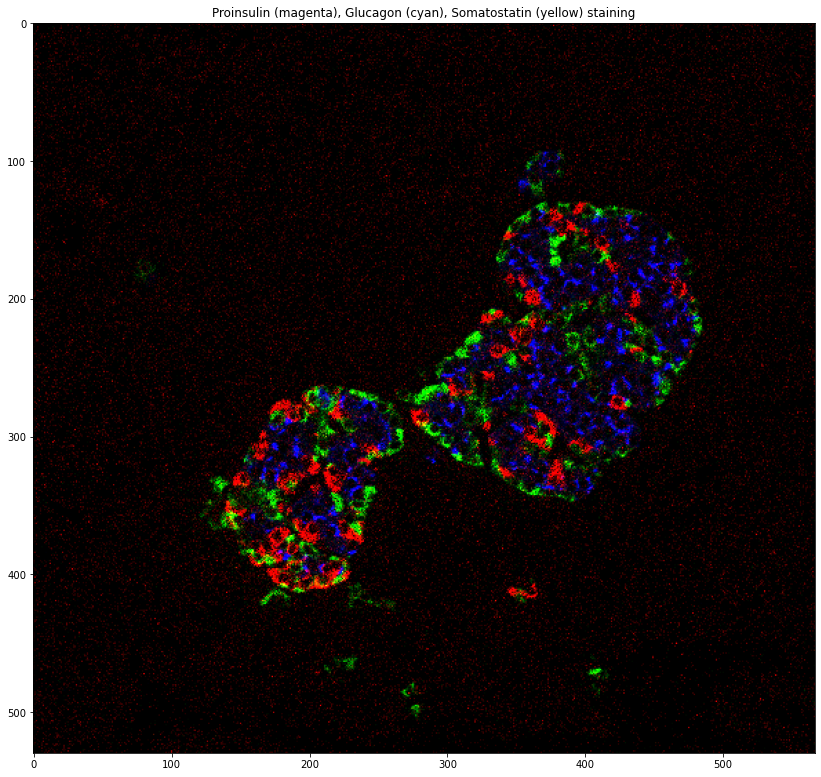

In [16]:
fig, axes = plt.subplots(1,1, figsize=(14,14))
plt.imshow(pseudo_im)
plt.title('Proinsulin (magenta), Glucagon (cyan), Somatostatin (yellow) staining')
plt.show()

### Display DNA only (cell nuclei) - chn 36 (Ir191) and chn 37 (Ir193)
Hint from Jørn Skavland (Jorn.Skavland@uib.no) Oct 1st 2020 at https://www.uib.no/en/ccbio/136800/hyperion-imaging-system

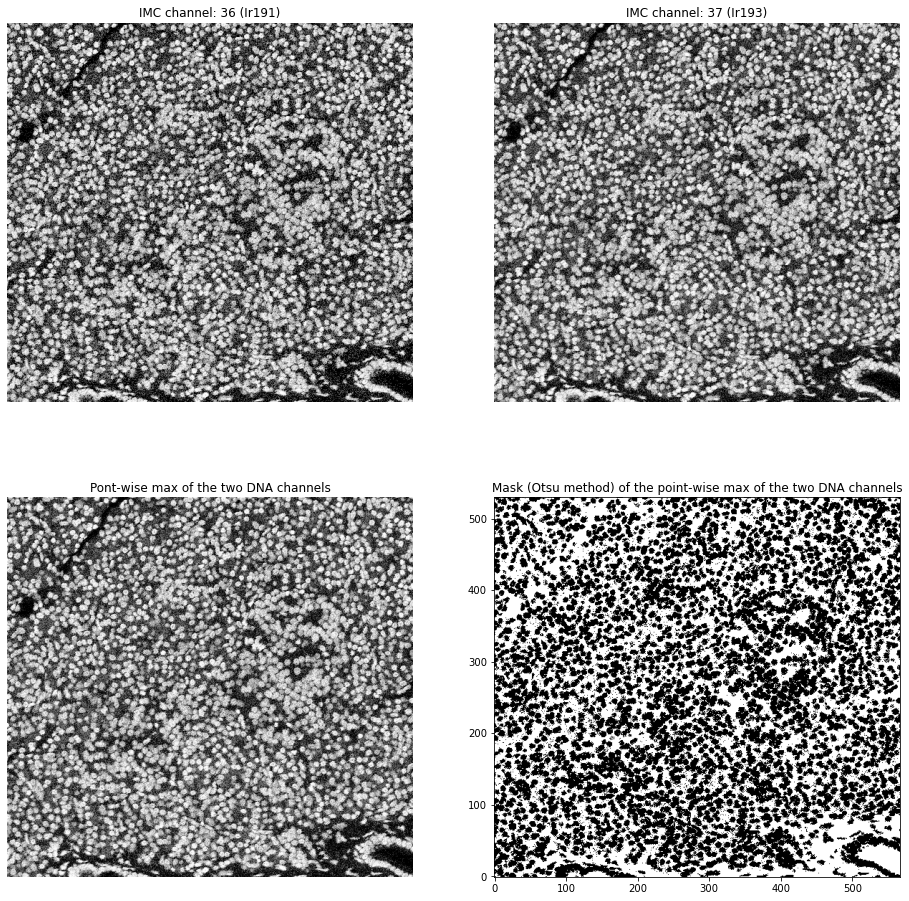

In [113]:
# Select channels (-1 i.e. we are starting at channel 0)
c = [35, 36]

def hist_eq(chn):
    return np.sort(chn.ravel()).searchsorted(chn)

fig, axes = plt.subplots(2,2, figsize=(16,16))
ax = axes.ravel()
chn0 = np.flip(np.squeeze(im[c[0],:,:]), axis=0)
ax[0].imshow(hist_eq(chn0), cmap='gray', origin='lower')
ax[0].set(xlabel="")
ax[0].axis('off')
ax[0].set_title('IMC channel: %d (%s)' % (c[0]+1, df.chn.iloc[c[0]]))

chn1 = np.flip(np.squeeze(im[c[1],:,:]), axis=0)
ax[1].imshow(hist_eq(chn1), cmap='gray', origin='lower')
ax[1].set(xlabel="")
ax[1].axis('off')
ax[1].set_title('IMC channel: %d (%s)' % (c[1]+1, df.chn.iloc[c[1]]))

#chn = (chn0+chn1)/2 
chn = np.maximum(chn0, chn1)  # point-wise maximum of the two DNA channels
ax[2].imshow(hist_eq(chn), cmap='gray', origin='lower')
ax[2].set(xlabel="")
ax[2].axis('off')
ax[2].set_title('Pont-wise max of the two DNA channels')

t = threshold_otsu(hist_eq(chn))
mask = hist_eq(chn) > t
# mask = ndimage.median_filter(hist_eq(chn)

# ax[3].imshow(mask, cmap='viridis', origin='lower')  #'viridis', 'gray'
ax[3].imshow(1-mask, cmap='gray', origin='lower')  #'viridis', 'gray'
ax[3].set_title('Mask (Otsu method) of the point-wise max of the two DNA channels')
plt.show()

## Cell segmentation using the two DNA-channels and  K-means clustering

In [38]:
# Select the DNA channels (-1 i.e. we are starting at channel 0)
c = [35, 36]

def hist_eq(chn):
    return np.sort(chn.ravel()).searchsorted(chn)

chn0 = np.flip(np.squeeze(im[c[0],:,:]), axis=0)
dna1_eq = hist_eq(chn0)
chn1 = np.flip(np.squeeze(im[c[1],:,:]), axis=0)
dna2_eq = hist_eq(chn1)

In [39]:
# Generally, we could use a ROI mask for all cells in the slide. 
# Since cells are all over the slide, we let this ROI be the whole first channel in the slide stack + 1, i.e.
im_msk = im[0,:,:]+1
print(im_msk.flatten().min())
print(im_msk.flatten().max())
im_msk.shape

1.0
378.168


(530, 567)

In [41]:
# Find voxel locations (ind_roi) corresponding to tissue ROI (value >=1 inside ROI, 0 else) 
ind_roi = np.where(im_msk > 0) 
X0 = np.transpose(np.asarray(im[c[0],ind_roi[0],ind_roi[1]])) # The pixel DNA channel 1 values within the ROI
X1 = np.transpose(np.asarray(im[c[1],ind_roi[0],ind_roi[1]])) # The pixel DNA channel 2 values within the ROI
X = np.stack((X0, X1), axis=1)
X_eq = np.stack((dna1_eq.flatten(), dna2_eq.flatten()), axis=1)
print(X.shape)
print(X_eq.shape)

(300510, 2)
(300510, 2)


In [44]:
# Check feature vectors (CyTOF pixel signatures) for the first pixels
dfROI = pd.DataFrame(X)
dfROI.head(5)

0          1
0   2.414000   0.000000
1   4.589000  18.249001
2  52.974998  66.415001
3  39.678001  81.518997
4  31.754999  80.593002

In [45]:
# Check feature vectors (CyTOF pixel hist eq signatures) for the first pixels
dfROI_eq = pd.DataFrame(X_eq)
dfROI_eq.head(5)

0       1
0  177873       0
1  179737  157445
2  159964  179544
3  167743  136090
4   82542   68533

In [46]:
# Insert pixel locations in the dfROI data frame
dfROI.insert(loc = len(dfROI.columns),
           column = 'row',
           value = ind_roi[0])  # Row of pixel location
dfROI.insert(loc = len(dfROI.columns),
           column = 'col',
           value = ind_roi[1])  # Col of pixel location

In [47]:
dfROI.head()

0          1  row  col
0   2.414000   0.000000    0    0
1   4.589000  18.249001    0    1
2  52.974998  66.415001    0    2
3  39.678001  81.518997    0    3
4  31.754999  80.593002    0    4

In [48]:
dfROI.tail()

0          1  row  col
300505  25.278999  54.415001  529  562
300506  38.176998  88.170998  529  563
300507  30.969999  59.962002  529  564
300508  20.679001  35.198002  529  565
300509  12.137000  27.128000  529  566

### Unsupervised classification of the two DNA channels in the IMC data using K-means
Let X be the n x p data matrix, n = numper of samples (pixel signatures), p = feature vector dimension (number of channels)

In [50]:
X.shape

(300510, 2)

In [54]:
chn_names = df.chn
dna_names = chn_names[c]
dna_names

35    Ir191
36    Ir193
Name: chn, dtype: object

In [55]:
# Make data frame from unscaled X to check scaling
dX_unscaled = pd.DataFrame(X, columns=dna_names)
dX_unscaled.describe(percentiles = [0.5]).round(4).T

count     mean      std  min    50%      max
chn                                                   
Ir191  300510.0   9.1579  11.1752  0.0  4.184  140.742
Ir193  300510.0  17.3192  20.6129  0.0  7.691  298.314

### Scaling* of the DNA feature vectors (IMC signals) within the ROI mask
*) Scaling to zero mean and unit standard deviation

In [57]:
scaler = StandardScaler()  
scaler.fit(X.astype(float))

X_scaled = scaler.transform(X.astype(float))  

# Make data frame from scaled X to check scaling
dX_scaled = pd.DataFrame(X_scaled, columns=dna_names)
dX_scaled.head().T

0         1         2         3         4
chn                                                    
Ir191 -0.603476 -0.408848  3.920929  2.731059  2.022076
Ir193 -0.840214  0.045108  2.381805  3.114551  3.069628

In [58]:
dX_scaled.describe(percentiles = [0.5]).round(4).T

count  mean  std     min     50%      max
chn                                                
Ir191  300510.0  -0.0  1.0 -0.8195 -0.4451  11.7747
Ir193  300510.0   0.0  1.0 -0.8402 -0.4671  13.6320

**Fit the K-means model to the data (and time it)**

In [87]:
K =5  # Number of clusters (cell / no-cell / intermediate)
max_iter = 300 # Max number of iteration
tol = 0.0001 # Tolerance
kmeans_model = KMeans(n_clusters=K, random_state=42, max_iter=max_iter, tol=tol)
print(kmeans_model)

KMeans(n_clusters=5, random_state=42)


In [88]:
%%time
kmeans_fit = kmeans_model.fit(X_scaled)

Wall time: 5.31 s


In [89]:
print(kmeans_fit.labels_)
print('First centroid in p-dimensional feature vector space:\n', kmeans_fit.cluster_centers_[0,:])
print('Second centroid in p-dimensional feature vector space:\n', kmeans_fit.cluster_centers_[1,:])
print('Third centroid in p-dimensional feature vector space:\n', kmeans_fit.cluster_centers_[2,:])
print('Third centroid in p-dimensional feature vector space:\n', kmeans_fit.cluster_centers_[3,:])
print('Third centroid in p-dimensional feature vector space:\n', kmeans_fit.cluster_centers_[4,:])

[0 4 3 ... 2 1 4]
First centroid in p-dimensional feature vector space:
 [-0.64733124 -0.65572764]
Second centroid in p-dimensional feature vector space:
 [0.88211668 0.90044039]
Third centroid in p-dimensional feature vector space:
 [1.87700024 1.88480629]
Third centroid in p-dimensional feature vector space:
 [3.37588914 3.29622834]
Third centroid in p-dimensional feature vector space:
 [0.06116222 0.0800192 ]


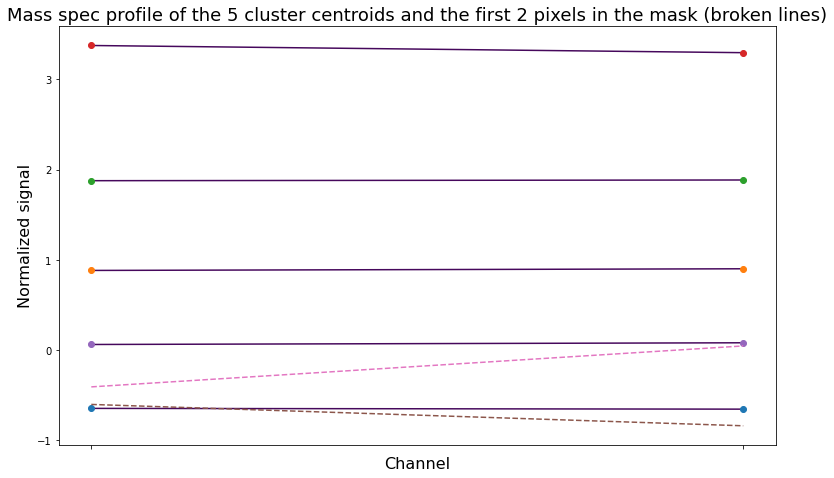

In [96]:
# Plot the cluster centroids as line plots

nv = 2

my_cmap = mpl.colors.ListedColormap(['white', 'black','blue', 'green', 'yellow'])
my_cmap_v = plt.cm.viridis(K)

fig, ax = plt.subplots(1,1)

fig.set_size_inches(12, 7)

plt.plot(kmeans_fit.cluster_centers_.T, color=my_cmap_v)
plt.plot(kmeans_fit.cluster_centers_.T, 'o')
plt.plot(X_scaled[:nv, :].T, '--')
plt.xlabel('Channel', fontsize=16)
ax.set_xticks([x for x in range(X_scaled.shape[1])])
ax.set_xticklabels([], rotation='vertical', fontsize=18)
plt.ylabel('Normalized signal', fontsize=16)
#plt.xlim(0, 3)
plt.title('Mass spec profile of the %d cluster centroids and the first %d pixels in the mask (broken lines)' % (K, nv), fontsize=18)

plt.subplots_adjust(bottom=.12, top=.95, right=.95, left=.12)

plt.show()

In [97]:
kmeans_segm = 0 * im_msk.copy()
print('Size of segmented image:', kmeans_segm.shape)
print('min:', kmeans_fit.labels_.min())
print('max:', kmeans_fit.labels_.max())
print('Number of clustered samples within ROI:', len(ind_roi[0]))

Size of segmented image: (530, 567)
min: 0
max: 4
Number of clustered samples within ROI: 300510


In [98]:
for v in range(len(ind_roi[0])):
    kmeans_segm[ind_roi[0][v], ind_roi[1][v]] = kmeans_fit.labels_[v]

In [99]:
# https://gist.github.com/jakevdp/91077b0cae40f8f8244a  By Jake VanderPlas
def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)

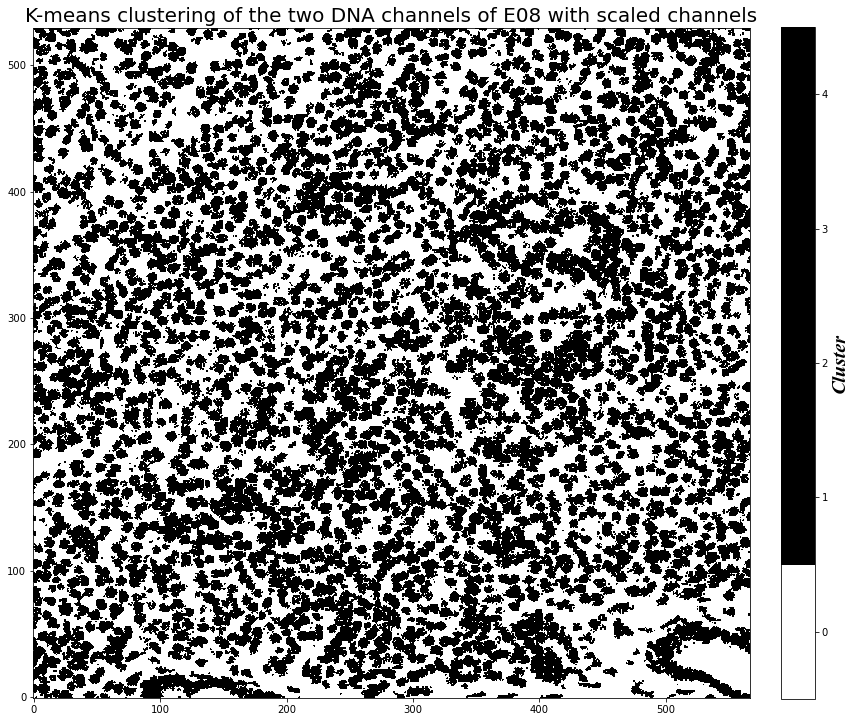

In [109]:
fig, axes = plt.subplots(1,1, figsize=(14,14))
# Possible colormaps: 'gray', 'jet', 'cubehelix', 
#my_cmap = mpl.colors.ListedColormap(['white', 'black','blue', 'green', 'yellow'])
my_cmap = mpl.colors.ListedColormap(['white', 'black','black', 'black', 'black'])
#plt.imshow(np.flip(kmeans_segm[:, :], axis=0), cmap=discrete_cmap(K, 'gray'), origin='lower') 
plt.imshow(np.flip(kmeans_segm[:, :], axis=0), cmap=my_cmap, origin='lower') 

#plt.imshow((dna1_eq/np.max(dna1_eq))*np.flip(kmeans_segm[:, :], axis=0), cmap=my_cmap, origin='lower')

# See: https://stackoverflow.com/questions/18195758/set-matplotlib-colorbar-size-to-match-graph
im_ratio = kmeans_segm.shape[0]/kmeans_segm.shape[1]
cb = plt.colorbar(label='Cluster', orientation='vertical', fraction=0.046*im_ratio, pad=0.04)
ax = cb.ax
text = ax.yaxis.label
font = mpl.font_manager.FontProperties(family='times new roman', style='italic', size=20)
text.set_font_properties(font)

plt.clim(-0.5, K - 0.5)
plt.title('K-means clustering of the two DNA channels of E08 with scaled channels', size=20)
plt.show()

## Analyses of all channels jointly (incl. K-means clustering)

In [18]:
# Min and macx and number of voxels in the 2D IMC multichannel image
print('Min:', im.flatten().min())
print('Max:', im.flatten().max())
print('Number of voxels:', im.flatten().size)

Min: 0.0
Max: 1473.511
Number of voxels: 11118870


In [19]:
# Generally, we could use a tissue ROI mask for the slide. 
# We let this ROI be the whole first channel in the slide stack + 1, i.e.
im_msk = im[0,:,:]+1
print(im_msk.flatten().min())
print(im_msk.flatten().max())
im_msk.shape

1.0
378.168


(530, 567)

**Find all pixel locations in the ROI for extracting a dataset X and corresponding pixel locations to a Pandas data frame (dfROI)**

In [20]:
# Find voxel locations (ind_roi) corresponding to tissue ROI (value >=1 inside ROI, 0 else) 
ind_roi = np.where(im_msk > 0) 
X = np.transpose(np.asarray(im[:,ind_roi[0],ind_roi[1]])) # The pixel channel signatures within the ROI
print(X.shape)

(300510, 37)


In [18]:
# Check feature vectors (CyTOF pixel signatures) for the three first pixels
dfROI = pd.DataFrame(X)
dfROI.head(3)

0      1    2      3       4      5    6      7    8      9   ...  \
0   1.066000  0.000  0.0  0.000  12.395  2.376  1.0  0.000  0.0  4.537  ...   
1  11.754000  3.143  0.0  1.000   8.871  5.189  0.0  2.414  0.0  6.969  ...   
2  18.483999  1.332  0.0  1.275   3.000  3.032  0.0  0.000  0.0  4.158  ...   

      27   28     29   30         31     32   33   34         35         36  
0  0.000  0.0  4.739  2.0  62.405998  6.346  0.0  1.0   2.414000   0.000000  
1  2.926  0.0  2.002  0.0  13.208000  5.364  0.0  0.0   4.589000  18.249001  
2  2.928  0.0  6.211  0.0   1.000000  1.000  0.0  0.0  52.974998  66.415001  

[3 rows x 37 columns]

In [19]:
# The three last pixels signatures in the enumeration
dfROI.tail(3)

0      1    2    3      4      5      6      7    8      9   \
300507  29.274000  1.853  1.0  0.0  0.000  1.751  2.413  1.037  0.0  0.000   
300508  23.422001  0.000  0.0  0.0  1.029  1.344  0.000  0.000  0.0  3.779   
300509  16.829000  4.459  0.0  0.0  0.000  3.032  0.000  0.000  0.0  0.000   

        ...   27   28   29   30      31     32   33   34         35         36  
300507  ...  0.0  0.0  2.0  0.0  10.933  3.000  0.0  1.0  30.969999  59.962002  
300508  ...  0.0  0.0  0.0  0.0   9.376  0.000  0.0  0.0  20.679001  35.198002  
300509  ...  0.0  0.0  1.0  0.0  11.806  2.758  0.0  1.0  12.137000  27.128000  

[3 rows x 37 columns]

**Insert pixel locations in the ROI**

In [20]:
dfROI.insert(loc = len(dfROI.columns),
           column = 'row',
           value = ind_roi[0])  # Row of pixel location
dfROI.insert(loc = len(dfROI.columns),
           column = 'col',
           value = ind_roi[1])  # Col of pixel location

In [21]:
dfROI.head()

0      1    2      3       4      5      6      7    8      9  ...  \
0   1.066000  0.000  0.0  0.000  12.395  2.376  1.000  0.000  0.0  4.537  ...   
1  11.754000  3.143  0.0  1.000   8.871  5.189  0.000  2.414  0.0  6.969  ...   
2  18.483999  1.332  0.0  1.275   3.000  3.032  0.000  0.000  0.0  4.158  ...   
3  15.564000  3.129  0.0  0.000   1.000  2.126  1.912  0.000  1.0  0.000  ...   
4  19.813000  2.000  0.0  0.000   0.000  3.000  0.000  0.000  0.0  0.000  ...   

      29     30         31     32     33   34         35         36  row  col  
0  4.739  2.000  62.405998  6.346  0.000  1.0   2.414000   0.000000    0    0  
1  2.002  0.000  13.208000  5.364  0.000  0.0   4.589000  18.249001    0    1  
2  6.211  0.000   1.000000  1.000  0.000  0.0  52.974998  66.415001    0    2  
3  0.000  0.000   0.000000  0.000  1.146  0.0  39.678001  81.518997    0    3  
4  2.637  0.536   0.000000  1.000  0.000  0.0  31.754999  80.593002    0    4  

[5 rows x 39 columns]

In [22]:
dfROI.tail()

0      1    2    3      4      5      6      7    8      9  \
300505  14.342000  2.000  0.0  0.0  0.000  2.000  0.000  0.000  0.0  0.000   
300506  30.667000  2.838  0.0  0.0  0.000  1.282  0.000  0.000  0.0  0.000   
300507  29.274000  1.853  1.0  0.0  0.000  1.751  2.413  1.037  0.0  0.000   
300508  23.422001  0.000  0.0  0.0  1.029  1.344  0.000  0.000  0.0  3.779   
300509  16.829000  4.459  0.0  0.0  0.000  3.032  0.000  0.000  0.0  0.000   

        ...   29   30      31     32   33   34         35         36  row  col  
300505  ...  0.0  0.0   1.000  0.000  0.0  0.0  25.278999  54.415001  529  562  
300506  ...  0.0  0.0   6.564  1.000  0.0  0.0  38.176998  88.170998  529  563  
300507  ...  2.0  0.0  10.933  3.000  0.0  1.0  30.969999  59.962002  529  564  
300508  ...  0.0  0.0   9.376  0.000  0.0  0.0  20.679001  35.198002  529  565  
300509  ...  1.0  0.0  11.806  2.758  0.0  1.0  12.137000  27.128000  529  566  

[5 rows x 39 columns]

### Unsupervised classification of the 2D+CyTOF IMC data using K-means
Let X be the n x p data matrix, n = numper of samples (pixel signatures), p = feature vector dimension (number of channels)

In [23]:
X.shape

(300510, 37)

In [24]:
chn_names = df.chn
chn_names[:5]

0    In113
1    In115
2    Pr141
3    Nd142
4    Nd143
Name: chn, dtype: object

In [25]:
# Make data frame from unscaled X to check scaling
dX_unscaled = pd.DataFrame(X, columns=chn_names)
dX_unscaled.describe(percentiles = [0.5]).round(4).T

count     mean      std  min    50%        max
chn                                                     
In113  300510.0   8.5177   9.9722  0.0  5.181   377.1680
In115  300510.0   1.0210   1.8116  0.0  0.000    84.2350
Pr141  300510.0   0.2025   0.6047  0.0  0.000    24.3300
Nd142  300510.0   0.3015   0.6812  0.0  0.000    13.9050
Nd143  300510.0   1.2852   2.9146  0.0  0.000    71.6480
Nd144  300510.0   2.0594   5.3611  0.0  1.000   241.6350
Nd145  300510.0   4.3234  10.2152  0.0  1.000   164.4120
Nd146  300510.0   0.5158   1.3196  0.0  0.000    59.8750
Sm147  300510.0   0.3839   2.1355  0.0  0.000   136.5310
Nd148  300510.0   1.3117   1.9430  0.0  1.000    58.1820
Sm149  300510.0   0.0496   0.2554  0.0  0.000     5.3560
Nd150  300510.0   1.1620   1.8029  0.0  0.000    31.3140
Sm152  300510.0   0.1656   0.7460  0.0  0.000   206.4100
Eu153  300510.0   0.1401   6.1348  0.0  0.000  1291.9170
Sm154  300510.0   1.7183  10.6050  0.0  0.000   475.3810
Gd156  300510.0   0.4007   2.4878  0.0  0.000   120.5600
Gd158  300510.0   3.2923   4.3932  0.0  1.975   137.5900
Tb159  300510.0   0.3574   1.1295  0.0  0.000    35.8870
Gd160  300510.0   2.7232   6.3112  0.0  0.000    71.8330
Dy161  300510.0   0.4590   1.5305  0.0  0.000    69.6320
Dy162  300510.0   0.1424   0.5523  0.0  0.000    27.1090
Dy163  300510.0   0.0740   0.3294  0.0  0.000    43.1960
Dy164  300510.0   0.9707   3.0352  0.0  0.000  1473.5110
Ho165  300510.0   0.2224   0.7344  0.0  0.000    49.6050
Er166  300510.0   1.1851   2.4936  0.0  0.000   141.4180
Er167  300510.0   4.6489  19.8849  0.0  1.000  1089.1851
Er168  300510.0   0.1827   0.7949  0.0  0.000    37.3370
Tm169  300510.0   0.5023   1.0981  0.0  0.000    18.9380
Er170  300510.0   0.0263   0.1918  0.0  0.000     6.2640
Yb171  300510.0   1.3476   1.5817  0.0  1.000    20.5310
Yb172  300510.0   0.4882   1.5082  0.0  0.000    52.5890
Yb173  300510.0   5.6188   8.1663  0.0  2.275   102.5560
Yb174  300510.0   1.9185   4.3402  0.0  1.000   108.2610
Lu175  300510.0   0.1841   1.0424  0.0  0.000   337.2610
Yb176  300510.0   0.3452   0.7959  0.0  0.000   159.1550
Ir191  300510.0   9.1579  11.1752  0.0  4.184   140.7420
Ir193  300510.0  17.3192  20.6129  0.0  7.691   298.3140

### Scaling* of feature vectors (IMC signals), channel-by-channel wthin the ROI mask
*) Scaling to zero mean and unit standard deviation

In [26]:
scaler = StandardScaler()  
scaler.fit(X.astype(float))

X_scaled = scaler.transform(X.astype(float))  

# Make data frame from scaled X to check scaling
dX_scaled = pd.DataFrame(X_scaled, columns=chn_names)
dX_scaled.head().T

0         1         2         3         4
chn                                                    
In113 -0.747246  0.324537  0.999415  0.706600  1.132686
In115 -0.563615  1.171339  0.171656  1.163610  0.540396
Pr141 -0.334873 -0.334873 -0.334873 -0.334873 -0.334873
Nd142 -0.442636  1.025362  1.429061 -0.442636 -0.442636
Nd143  3.811833  2.602732  0.588363 -0.097846 -0.440951
Nd144  0.059062  0.583768  0.181425  0.012429  0.175456
Nd145 -0.325340 -0.423234 -0.423234 -0.236061 -0.423234
Nd146 -0.390886  1.438514 -0.390886 -0.390886 -0.390886
Sm147 -0.179775 -0.179775 -0.179775  0.288491 -0.179775
Nd148  1.659931  2.911597  1.464873 -0.675106 -0.675106
Sm149 -0.194010 -0.194010 -0.194010 -0.194010 -0.194010
Nd150 -0.063774 -0.089842 -0.089842 -0.644494  0.526376
Sm152 -0.221999 -0.221999 -0.221999 -0.221999  1.118467
Eu153 -0.022831 -0.022831 -0.022831 -0.022831 -0.022831
Sm154 -0.067731 -0.162026 -0.162026 -0.162026 -0.162026
Gd156 -0.161074 -0.161074 -0.161074 -0.161074 -0.161074
Gd158 -0.212221  0.421489  2.898966  0.721044  2.784243
Tb159  0.568894  0.918612 -0.316467 -0.316467 -0.316467
Gd160 -0.114584 -0.273033 -0.431481 -0.431481 -0.431481
Dy161  3.016705  2.583508  1.205511  0.353491 -0.299898
Dy162 -0.257884 -0.257884 -0.257884 -0.257884 -0.257884
Dy163 -0.224520  5.245357 -0.224520 -0.224520  2.810928
Dy164 -0.319831  0.416205  0.015569  0.377657 -0.319831
Ho165 -0.302868 -0.302868 -0.302868 -0.302868 -0.302868
Er166  0.468359  0.874996  1.236317 -0.074225 -0.074225
Er167 -0.233791 -0.113247 -0.133212 -0.183501 -0.233791
Er168 -0.229795 -0.229795  2.189409 -0.229795 -0.229795
Tm169 -0.457398  2.207239  2.209060  4.482105  4.454785
Er170 -0.137205 -0.137205 -0.137205 -0.137205 -0.137205
Yb171  2.144128  0.413745  3.074754 -0.851957  0.815204
Yb172  1.002371 -0.323724 -0.323724 -0.323724  0.031669
Yb173  6.953853  0.929329 -0.565598 -0.688052 -0.688052
Yb174  1.020117  0.793858 -0.211637 -0.442044 -0.211637
Lu175 -0.176582 -0.176582 -0.176582  0.922830 -0.176582
Yb176  0.822800 -0.433681 -0.433681 -0.433681 -0.433681
Ir191 -0.603476 -0.408848  3.920929  2.731059  2.022076
Ir193 -0.840214  0.045108  2.381805  3.114551  3.069628

In [27]:
dX_scaled.describe(percentiles = [0.5]).round(4).T

count  mean  std     min     50%       max
chn                                                 
In113  300510.0   0.0  1.0 -0.8541 -0.3346   36.9679
In115  300510.0  -0.0  1.0 -0.5636 -0.5636   45.9346
Pr141  300510.0  -0.0  1.0 -0.3349 -0.3349   39.9033
Nd142  300510.0  -0.0  1.0 -0.4426 -0.4426   19.9699
Nd143  300510.0  -0.0  1.0 -0.4410 -0.4410   24.1418
Nd144  300510.0  -0.0  1.0 -0.3841 -0.1976   44.6878
Nd145  300510.0   0.0  1.0 -0.4232 -0.3253   15.6717
Nd146  300510.0   0.0  1.0 -0.3909 -0.3909   44.9841
Sm147  300510.0  -0.0  1.0 -0.1798 -0.1798   63.7531
Nd148  300510.0   0.0  1.0 -0.6751 -0.1604   29.2691
Sm149  300510.0  -0.0  1.0 -0.1940 -0.1940   20.7734
Nd150  300510.0  -0.0  1.0 -0.6445 -0.6445   16.7239
Sm152  300510.0  -0.0  1.0 -0.2220 -0.2220  276.4635
Eu153  300510.0  -0.0  1.0 -0.0228 -0.0228  210.5653
Sm154  300510.0  -0.0  1.0 -0.1620 -0.1620   44.6642
Gd156  300510.0  -0.0  1.0 -0.1611 -0.1611   48.2992
Gd158  300510.0  -0.0  1.0 -0.7494 -0.2999   30.5696
Tb159  300510.0  -0.0  1.0 -0.3165 -0.3165   31.4565
Gd160  300510.0   0.0  1.0 -0.4315 -0.4315   10.9504
Dy161  300510.0  -0.0  1.0 -0.2999 -0.2999   45.1969
Dy162  300510.0   0.0  1.0 -0.2579 -0.2579   48.8234
Dy163  300510.0   0.0  1.0 -0.2245 -0.2245  130.8947
Dy164  300510.0  -0.0  1.0 -0.3198 -0.3198  485.1580
Ho165  300510.0  -0.0  1.0 -0.3029 -0.3029   67.2406
Er166  300510.0   0.0  1.0 -0.4752 -0.4752   56.2366
Er167  300510.0   0.0  1.0 -0.2338 -0.1835   54.5407
Er168  300510.0   0.0  1.0 -0.2298 -0.2298   46.7415
Tm169  300510.0  -0.0  1.0 -0.4574 -0.4574   16.7890
Er170  300510.0   0.0  1.0 -0.1372 -0.1372   32.5141
Yb171  300510.0  -0.0  1.0 -0.8520 -0.2197   12.1281
Yb172  300510.0  -0.0  1.0 -0.3237 -0.3237   34.5453
Yb173  300510.0   0.0  1.0 -0.6881 -0.4095   11.8704
Yb174  300510.0  -0.0  1.0 -0.4420 -0.2116   24.5020
Lu175  300510.0  -0.0  1.0 -0.1766 -0.1766  323.3737
Yb176  300510.0   0.0  1.0 -0.4337 -0.4337  199.5416
Ir191  300510.0  -0.0  1.0 -0.8195 -0.4451   11.7747
Ir193  300510.0   0.0  1.0 -0.8402 -0.4671   13.6320

**Fit the K-means model to the data (and time it)**

In [28]:
K = 7  # Number of clusters
max_iter = 300 # Max number of iteration
tol = 0.0001 # Tolerance
kmeans_model = KMeans(n_clusters=K, random_state=42, max_iter=max_iter, tol=tol)
print(kmeans_model)

KMeans(n_clusters=7, random_state=42)


In [29]:
%%time
kmeans_fit = kmeans_model.fit(X_scaled)

CPU times: user 1min 34s, sys: 2.73 s, total: 1min 37s
Wall time: 6.55 s


In [30]:
print(kmeans_fit.labels_)
print('First centroid in p-dimensional feature vector space:\n', kmeans_fit.cluster_centers_[0,:])

[4 4 0 ... 0 4 0]
First centroid in p-dimensional feature vector space:
 [ 1.21843906  0.49083214 -0.03832607 -0.10059465 -0.2269227  -0.17524045
 -0.25649514 -0.1586747  -0.05497639 -0.28425862  0.0032     -0.15045402
 -0.0282817  -0.01304185 -0.10484276 -0.10329715  0.3464075  -0.03429125
 -0.23594693 -0.07057792 -0.04906081 -0.00928624 -0.05129641 -0.05523314
 -0.16694344 -0.14560205 -0.0812474   0.11341002 -0.04356759 -0.2089804
 -0.13503731 -0.29335455 -0.23643083  0.13949664 -0.04038111  1.51188364
  1.52539671]


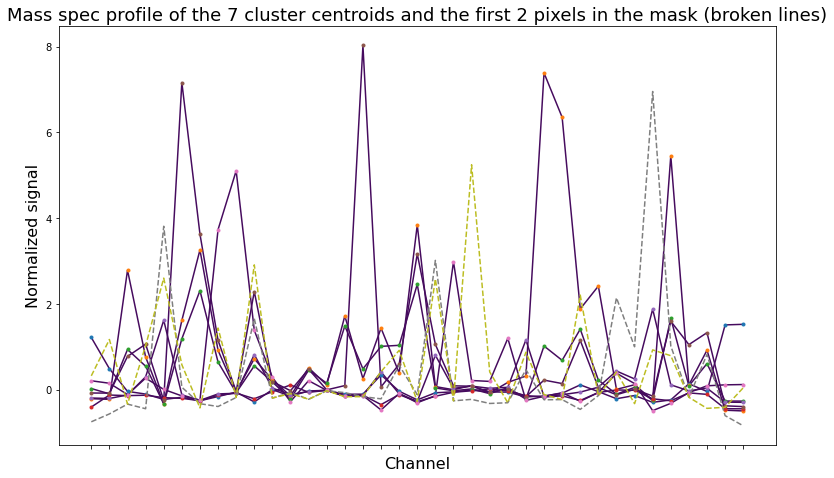

In [31]:
# Plot the cluster centroids as line plots

nv = 2

my_cmap = mpl.colors.ListedColormap(['red', '#000000','#444444', '#666666', '#ffffff', 'blue', 'orange'])
my_cmap_v = plt.cm.viridis(K)

fig, ax = plt.subplots(1,1)

fig.set_size_inches(12, 7)

plt.plot(kmeans_fit.cluster_centers_.T, color=my_cmap_v)
plt.plot(kmeans_fit.cluster_centers_.T, '.')
plt.plot(X_scaled[:nv, :].T, '--')
plt.xlabel('Channel', fontsize=16)
ax.set_xticks([x for x in range(X_scaled.shape[1])])
ax.set_xticklabels([], rotation='vertical', fontsize=18)
plt.ylabel('Normalized signal', fontsize=16)
#plt.xlim(0, 3)
plt.title('Mass spec profile of the %d cluster centroids and the first %d pixels in the mask (broken lines)' % (K, nv), fontsize=18)

plt.subplots_adjust(bottom=.12, top=.95, right=.95, left=.12)

plt.show()

**Make a k-means segmented image (segmentation restricted to the ROI)**

In [32]:
kmeans_segm = 0 * im_msk.copy()
print('Size of segmented image:', kmeans_segm.shape)
print('min:', kmeans_fit.labels_.min())
print('max:', kmeans_fit.labels_.max())
print('Number of clustered samples within ROI:', len(ind_roi[0]))

Size of segmented image: (530, 567)
min: 0
max: 6
Number of clustered samples within ROI: 300510


**Assign the cluster belonging to each voxel within the ROI**

In [33]:
for v in range(len(ind_roi[0])):
    kmeans_segm[ind_roi[0][v], ind_roi[1][v]] = kmeans_fit.labels_[v]

In [34]:
# https://gist.github.com/jakevdp/91077b0cae40f8f8244a  By Jake VanderPlas
def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)

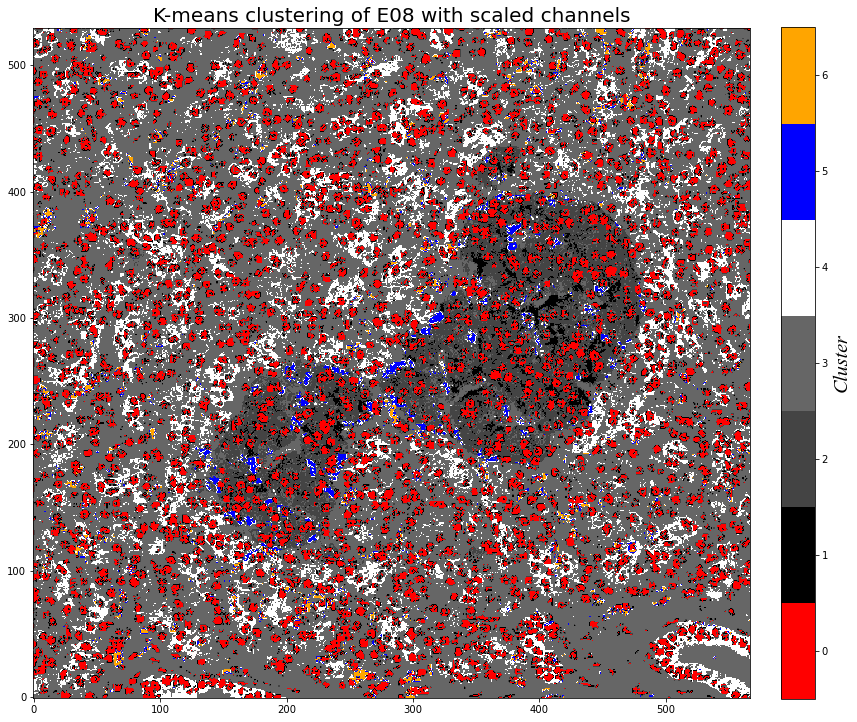

In [35]:
fig, axes = plt.subplots(1,1, figsize=(14,14))
# Possible colormaps: 'gray', 'jet', 'cubehelix', 
my_cmap = mpl.colors.ListedColormap(['red', '#000000','#444444', '#666666', '#ffffff', 'blue', 'orange'])
#plt.imshow(np.flip(kmeans_segm[:, :], axis=0), cmap=discrete_cmap(K, 'gray'), origin='lower') 
plt.imshow(np.flip(kmeans_segm[:, :], axis=0), cmap=my_cmap, origin='lower') 

# See: https://stackoverflow.com/questions/18195758/set-matplotlib-colorbar-size-to-match-graph
im_ratio = kmeans_segm.shape[0]/kmeans_segm.shape[1]
cb = plt.colorbar(label='Cluster', orientation='vertical', fraction=0.046*im_ratio, pad=0.04)
ax = cb.ax
text = ax.yaxis.label
font = mpl.font_manager.FontProperties(family='times new roman', style='italic', size=20)
text.set_font_properties(font)

plt.clim(-0.5, K - 0.5)
plt.title('K-means clustering of E08 with scaled channels', size=20)
plt.show()

**The following function gives the largest connected segmentation which is not backgroud. The shape of input and output is the same which could be 2D or 3D images.**
https://stackoverflow.com/questions/47540926/get-the-largest-connected-component-of-segmentation-image

In [36]:
import numpy as np
from skimage.measure import label

def getLargestCC(segmentation):
    labels = label(segmentation)
    unique, counts = np.unique(labels, return_counts=True)
    list_seg=list(zip(unique, counts))[1:] # the 0 label is by default background so take the rest
    largest=max(list_seg, key=lambda x:x[1])[0]
    labels_max=(labels == largest).astype(int)
    return labels_max

In [37]:
kmeans_segm_max = getLargestCC(kmeans_segm)

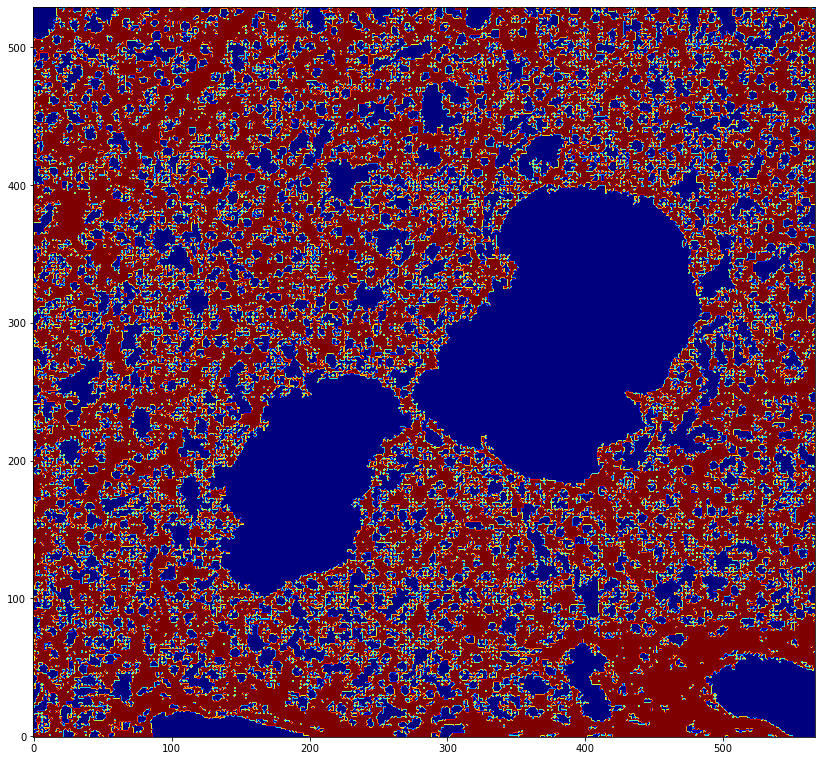

In [38]:
fig, axes = plt.subplots(1,1, figsize=(14,14))
plt.imshow(np.flip(kmeans_segm_max[:, :], axis=0), cmap='jet', origin='lower')
plt.show()

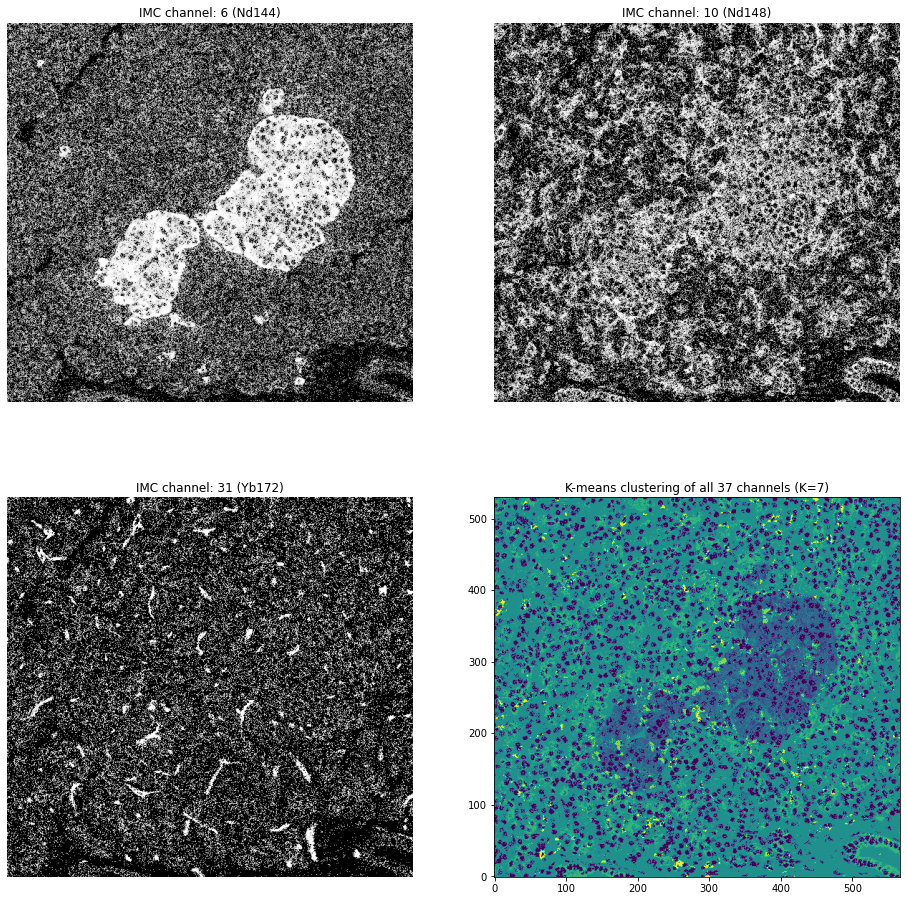

In [39]:
# Select channels (-1 i.e. we are starting at channel 0)
c = [5, 9, 30]

def hist_eq(chn):
    return np.sort(chn.ravel()).searchsorted(chn)


fig, axes = plt.subplots(2,2, figsize=(16,16))
ax = axes.ravel()
chn = np.flip(np.squeeze(im[c[0],:,:]), axis=0)
ax[0].imshow(hist_eq(chn), cmap='gray', origin='lower')
ax[0].set(xlabel="")
ax[0].axis('off')
ax[0].set_title('IMC channel: %d (%s)' % (c[0]+1, df.chn.iloc[c[0]]))

chn = np.flip(np.squeeze(im[c[1],:,:]), axis=0)
ax[1].imshow(hist_eq(chn), cmap='gray', origin='lower')
ax[1].set(xlabel="")
ax[1].axis('off')
ax[1].set_title('IMC channel: %d (%s)' % (c[1]+1, df.chn.iloc[c[1]]))

chn = np.flip(np.squeeze(im[c[2],:,:]), axis=0)
ax[2].imshow(hist_eq(chn), cmap='gray', origin='lower')
ax[2].set(xlabel="")
ax[2].axis('off')
ax[2].set_title('IMC channel: %d (%s)' % (c[2]+1, df.chn.iloc[c[2]]))

ax[3].imshow(np.flip(kmeans_segm[:, :], axis=0), cmap='viridis', origin='lower')  #'viridis', 'gray'
ax[3].set_title('K-means clustering of all %d channels (K=%d)' % (n_chn, K))

#plt.tight_layout
plt.show()

Check: https://github.com/computational-medicine/BMED360-2020/blob/master/perfusion/01-perf-explore.ipynb for more

## EXTRA

**Create a Z-stack with numpy**
https://forum.image.sc/t/create-a-z-stack-with-numpy/28379


I tried creating a simple/random 5D image like so:

```
data_0 = np.random.randint(0, 255, (2, 5, 3, 300, 300), 'uint8')

with tifffile.TiffWriter('path/to/temp.ome.tiff') as tif:
    tif.save(data_0, metadata={'axes':'TZCYX'})
````

**Problem**

When I try opening it with Fiji, a have a 300X300 colored image but the SizeZ is 1 and SizeT is 10.


**A:** you might get what you want by using imagej=True in the TiffWriter constructor:

``` 
with tifffile.TiffWriter('path/to/temp.ome.tiff', imagej=True) as tif:
    tif.save(data_0)

#or directly
tifffile.imwrite('path/to/temp.ome.tiff', data_0, imagej=True)
```

````
imagej : bool
      If True, write an ImageJ hyperstack compatible file.
      This format can handle data types uint8, uint16, or float32 and
      data shapes up to 6 dimensions in TZCYXS order.
      RGB images (S=3 or S=4) must be uint8.
      ImageJ's default byte order is big-endian but this implementation
      uses the system's native byte order by default.
      ImageJ hyperstacks do not support BigTIFF or compression.
      The ImageJ file format is undocumented.
      When using compression, use ImageJ's Bio-Formats import function.
````
